# California ACT SAT Analysis

## SAT Analysis (1/3)

### Contents
- [Data Import](#Data-Import)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)
- [Data Dictionary](#Data-Dictionary)

## Data Import

### All libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import CategoricalDtype

In [2]:
# Change to display the max number of rows and columns
# Reference: https://kakakakakku.hatenablog.com/entry/2021/04/19/090229
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Read in the data

####  2019 SAT Scores in California by School

In [3]:
# Import and display the datasets
sat = pd.read_csv('../data/original/sat_2019_ca.csv')
sat.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,Enroll11,NumTSTTakr11,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,NaN,NaN,NaN,NaN,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,*,*,*,*,26.0,6.0,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,31,30.39,14,13.73,219.0,174.0,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,54,47.79,18,15.93,333.0,275.0,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,*,*,*,*,17.0,5.0,*,*,*,*,*,*,*,*,2018-19,NaN


In [4]:
# check data info 
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    2579 non-null   float64
 1   CCode                  2579 non-null   float64
 2   CDCode                 2579 non-null   float64
 3   SCode                  2579 non-null   float64
 4   RType                  2579 non-null   object 
 5   SName                  1982 non-null   object 
 6   DName                  2521 non-null   object 
 7   CName                  2579 non-null   object 
 8   Enroll12               2579 non-null   float64
 9   NumTSTTakr12           2579 non-null   float64
 10  NumERWBenchmark12      2304 non-null   object 
 11  PctERWBenchmark12      2304 non-null   object 
 12  NumMathBenchmark12     2304 non-null   object 
 13  PctMathBenchmark12     2304 non-null   object 
 14  Enroll11               2579 non-null   float64
 15  NumT

In [5]:
sat.shape

(2580, 26)

## Data Cleaning

### Check for missing values

`Unnamed: 25` column was dropped, as there are 2580 missing values. Also, rows with missing values in `SName` were dropped as there are 598 values and school names cannot be estimated. Also, rows with missing values in `TotNumBothBenchmark11` and `NumMathBenchmark12` were dropped, as these rows are also missing values in other columns like `PctBothBenchmark11`, `PctMathBenchmark11`, `NumMathBenchmark11`, `PctERWBenchmark11`, `NumERWBenchmark11`, `PctBothBenchmark12`, `TotNumBothBenchmark12`, `PctMathBenchmark12`, `PctERWBenchmark12`, and `NumERWBenchmark12`. These process handled all the missing values in the dataset.

In [6]:
# Check any missing values 
sat.isnull().sum().sort_values(ascending=False)

Unnamed: 25              2580
SName                     598
PctBothBenchmark11        311
TotNumBothBenchmark11     311
PctMathBenchmark11        311
NumMathBenchmark11        311
PctERWBenchmark11         311
NumERWBenchmark11         311
NumMathBenchmark12        276
PctBothBenchmark12        276
TotNumBothBenchmark12     276
PctMathBenchmark12        276
PctERWBenchmark12         276
NumERWBenchmark12         276
DName                      59
CCode                       1
Enroll11                    1
NumTSTTakr11                1
NumTSTTakr12                1
Enroll12                    1
CName                       1
RType                       1
SCode                       1
CDCode                      1
Year                        1
CDS                         1
dtype: int64

In [7]:
# Drop Unnamed: 25 columns 
sat.drop(columns=['Unnamed: 25'], inplace=True)

In [8]:
# Drop rows with missing values in 'SName' &'TotNumBothBenchmark11' & 'NumMathBenchmark12' column 
sat.dropna(subset=['SName', 'TotNumBothBenchmark11', 'NumMathBenchmark12'], axis=0, inplace=True)

In [9]:
# Check the missing values again
sat.isnull().sum().sort_values(ascending=False)

CDS                      0
PctMathBenchmark12       0
PctBothBenchmark11       0
TotNumBothBenchmark11    0
PctBothBenchmark12       0
TotNumBothBenchmark12    0
PctMathBenchmark11       0
NumMathBenchmark11       0
PctERWBenchmark11        0
NumERWBenchmark11        0
NumTSTTakr11             0
Enroll11                 0
NumMathBenchmark12       0
CCode                    0
PctERWBenchmark12        0
NumERWBenchmark12        0
NumTSTTakr12             0
Enroll12                 0
CName                    0
DName                    0
SName                    0
RType                    0
SCode                    0
CDCode                   0
Year                     0
dtype: int64

In [10]:
sat.shape

(1602, 25)

### Check for [*] values 

There are `*` values listed in columns like `ERWBenchmark12`, `MathBenchmark12`,`ERWBenchmark11`, `MathBenchmark11`, `BothBenchmark12`, and `BothBenchmark11` (in both `TotNum` and `Pct`. According to the source, an asterisk `*` is displayed for schools with 14 or fewer students taking the SAT in order to preserve the anonymity of the students. These rows were dropped from the dataset.

In [11]:
# List columns where data types are 'object'
# Reference: https://stackoverflow.com/questions/43049545/python-check-if-dataframe-column-contain-string-type
sat.columns[sat.dtypes==object].tolist()

['RType',
 'SName',
 'DName',
 'CName',
 'NumERWBenchmark12',
 'PctERWBenchmark12',
 'NumMathBenchmark12',
 'PctMathBenchmark12',
 'NumERWBenchmark11',
 'PctERWBenchmark11',
 'NumMathBenchmark11',
 'PctMathBenchmark11',
 'TotNumBothBenchmark12',
 'PctBothBenchmark12',
 'TotNumBothBenchmark11',
 'PctBothBenchmark11',
 'Year']

In [12]:
# Print unique values in 'AvgScr' in all sections
print('NumERWBenchmark12')
print(sat['NumERWBenchmark12'].unique()[0:1])
print('----------')

print('NumMathBenchmark12')
print(sat['NumMathBenchmark12'].unique()[0:1])
print('----------')

print('NumERWBenchmark11')
print(sat['NumERWBenchmark11'].unique()[0:1])
print('----------')

print('NumMathBenchmark11')
print(sat['NumMathBenchmark11'].unique()[0:1])
print('----------')

print('TotNumBothBenchmark12')
print(sat['TotNumBothBenchmark12'].unique()[0:1])
print('----------')

print('TotNumBothBenchmark11')
print(sat['TotNumBothBenchmark11'].unique()[0:1])
print('----------')


NumERWBenchmark12
['*']
----------
NumMathBenchmark12
['*']
----------
NumERWBenchmark11
['*']
----------
NumMathBenchmark11
['*']
----------
TotNumBothBenchmark12
['*']
----------
TotNumBothBenchmark11
['*']
----------


In [13]:
# An asterisk is displayed for schools with 14 or fewer students taking the ACT 
# in order to preserve the anonymity of the students. 

# Replace '*' to np.nan
sat = sat.replace('*', np.nan)

# Drop columns where value is nan
sat.dropna(axis=0, how = 'any', inplace=True)

In [14]:
# Another way to iterate through each row and select rows that do not have '*', 
# Reference: https://www.geeksforgeeks.org/different-ways-to-iterate-over-rows-in-pandas-dataframe/
# for i in range(0,len(sat_2019_ca_new.columns)):  
#     sat_2019_ca_new = sat_2019_ca_new.loc[sat_2019_ca_new[sat_2019_ca_new.columns[i]] != '*']

In [15]:
sat.shape

(1199, 25)

### Check for outliers (California statewide level data) 

The dataset includes `State of California` data. As this would impact the analysis later, its data was deleted its row from the original dataset and saved in a new dataset called `sat_cali` (which ended up not being used for this project). 

In [16]:
# Descriptive statistics
sat.describe()

,CDS,CCode,CDCode,SCode,Enroll12,NumTSTTakr12,Enroll11,NumTSTTakr11
count,1.199000e+03,1199.000000,1.199000e+03,1.199000e+03,1199.000000,1199.000000,1199.000000,1199.000000
mean,2.851612e+13,27.852377,2.851611e+06,2.201036e+06,749.605505,280.667223,745.747289,340.194329
std,1.357358e+13,13.544919,1.357357e+06,1.781901e+06,14132.566795,4918.533677,13704.773550,5964.572368
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,25.000000,15.000000,29.000000,15.000000
25%,1.964733e+13,19.000000,1.964733e+06,1.294525e+05,141.000000,60.000000,145.000000,65.000000
50%,3.066464e+13,30.000000,3.066464e+06,1.937564e+06,339.000000,113.000000,352.000000,121.000000
75%,3.768338e+13,37.000000,3.768338e+06,3.636412e+06,498.500000,186.500000,505.000000,228.000000
max,5.872770e+13,58.000000,5.872769e+06,6.120893e+06,489650.000000,170411.000000,474843.000000,206642.000000


In [17]:
#look up the row that has the max number of enrollment 
sat.loc[sat['NumTSTTakr12'] == 170_411]

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,Enroll11,NumTSTTakr11,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year
2036,0.0,0.0,0.0,0.0,X,State of California,State of California,State of California,489650.0,170411.0,116500,68.36,81551,47.86,474843.0,206642.0,144318,69.84,108635,52.57,77178,45.29,103915,50.29,2018-19


In [18]:
# Save this to a new dataset
sat_cali = pd.DataFrame(sat.loc[sat['NumTSTTakr12'] == 170_411])
sat_cali

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,Enroll11,NumTSTTakr11,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year
2036,0.0,0.0,0.0,0.0,X,State of California,State of California,State of California,489650.0,170411.0,116500,68.36,81551,47.86,474843.0,206642.0,144318,69.84,108635,52.57,77178,45.29,103915,50.29,2018-19


In [19]:
# Delete the column in act dataset
sat.drop([2036], inplace=True)

In [20]:
sat.shape

(1198, 25)

### Fix any incorrect data types

The data types for `NumERWBenchmark`, `PctERWBenchmark`, `NumMathBenchmark`, `PctMathBenchmark`, `TotNumBothBenchmark`, and `PctBothBenchmark` columns (both `11` and `12`)were incorrectly saved as `object`. I converted these data types to `float`.

In [21]:
# Check data types
sat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198 entries, 2 to 1980
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    1198 non-null   float64
 1   CCode                  1198 non-null   float64
 2   CDCode                 1198 non-null   float64
 3   SCode                  1198 non-null   float64
 4   RType                  1198 non-null   object 
 5   SName                  1198 non-null   object 
 6   DName                  1198 non-null   object 
 7   CName                  1198 non-null   object 
 8   Enroll12               1198 non-null   float64
 9   NumTSTTakr12           1198 non-null   float64
 10  NumERWBenchmark12      1198 non-null   object 
 11  PctERWBenchmark12      1198 non-null   object 
 12  NumMathBenchmark12     1198 non-null   object 
 13  PctMathBenchmark12     1198 non-null   object 
 14  Enroll11               1198 non-null   float64
 15  NumT

In [22]:
# Convert object to integers
sat['NumERWBenchmark12'] = sat['NumERWBenchmark12'].astype(float)
sat['PctERWBenchmark12'] = sat['PctERWBenchmark12'].astype(float)
sat['NumMathBenchmark12'] = sat['NumMathBenchmark12'].astype(float)
sat['PctMathBenchmark12'] = sat['PctMathBenchmark12'].astype(float)
sat['TotNumBothBenchmark12'] = sat['TotNumBothBenchmark12'].astype(float)
sat['PctBothBenchmark12'] = sat['PctBothBenchmark12'].astype(float)
sat['PctBothBenchmark12'] = sat['PctBothBenchmark12'].astype(float)

sat['NumERWBenchmark11'] = sat['NumERWBenchmark11'].astype(float)
sat['PctERWBenchmark11'] = sat['PctERWBenchmark11'].astype(float)
sat['NumMathBenchmark11'] = sat['NumMathBenchmark11'].astype(float)
sat['PctMathBenchmark11'] = sat['PctMathBenchmark11'].astype(float)
sat['TotNumBothBenchmark11'] = sat['TotNumBothBenchmark11'].astype(float)
sat['PctBothBenchmark11'] = sat['PctBothBenchmark11'].astype(float)

In [23]:
# Check data types again
sat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198 entries, 2 to 1980
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    1198 non-null   float64
 1   CCode                  1198 non-null   float64
 2   CDCode                 1198 non-null   float64
 3   SCode                  1198 non-null   float64
 4   RType                  1198 non-null   object 
 5   SName                  1198 non-null   object 
 6   DName                  1198 non-null   object 
 7   CName                  1198 non-null   object 
 8   Enroll12               1198 non-null   float64
 9   NumTSTTakr12           1198 non-null   float64
 10  NumERWBenchmark12      1198 non-null   float64
 11  PctERWBenchmark12      1198 non-null   float64
 12  NumMathBenchmark12     1198 non-null   float64
 13  PctMathBenchmark12     1198 non-null   float64
 14  Enroll11               1198 non-null   float64
 15  NumT

### Rename column names

The column names in this dataset was renamed with lowercase and snakecase to improve readability and consistency of code. 

In [24]:
# Check current column names
sat.columns

Index(['CDS', 'CCode', 'CDCode', 'SCode', 'RType', 'SName', 'DName', 'CName',
       'Enroll12', 'NumTSTTakr12', 'NumERWBenchmark12', 'PctERWBenchmark12',
       'NumMathBenchmark12', 'PctMathBenchmark12', 'Enroll11', 'NumTSTTakr11',
       'NumERWBenchmark11', 'PctERWBenchmark11', 'NumMathBenchmark11',
       'PctMathBenchmark11', 'TotNumBothBenchmark12', 'PctBothBenchmark12',
       'TotNumBothBenchmark11', 'PctBothBenchmark11', 'Year'],
      dtype='object')

In [25]:
sat = sat.rename(columns = {
    'CDS': 'cds',
    'CCode': 'c_code',
    'CDCode': 'cd_code',
    'SCode': 's_code',
    'RType': 'r_type',
    'SName': 'school',
    'DName': 'district',
    'CName': 'county',
    'Enroll12': 'enroll_12',
    'NumTSTTakr12': 'num_of_testtakers',
    'NumERWBenchmark12': 'num_benchmark_reading_writing',
    'PctERWBenchmark12': 'pct_benchmark_reading_writing',
    'NumMathBenchmark12': 'num_benchmark_math',
    'PctMathBenchmark12': 'pct_benchmark_math',
    'TotNumBothBenchmark12': 'num_benchmark_both',
    'PctBothBenchmark12': 'pct_benchmark_both',
    'Enroll11': 'enroll_11', 
    'NumTSTTakr11': 'num_of_testtakers_11',
    'NumERWBenchmark11': 'num_benchmark_reading_writing_11',
    'PctERWBenchmark11': 'pct_benchmark_reading_writing_11',
    'NumMathBenchmark11': 'num_benchmark_math_11',
    'PctMathBenchmark11': 'pct_benchmark_math_11',
    'TotNumBothBenchmark11': 'num_benchmark_both_11',
    'PctBothBenchmark11': 'pct_benchmark_both11'
})

In [26]:
sat.columns

Index(['cds', 'c_code', 'cd_code', 's_code', 'r_type', 'school', 'district',
       'county', 'enroll_12', 'num_of_testtakers',
       'num_benchmark_reading_writing', 'pct_benchmark_reading_writing',
       'num_benchmark_math', 'pct_benchmark_math', 'enroll_11',
       'num_of_testtakers_11', 'num_benchmark_reading_writing_11',
       'pct_benchmark_reading_writing_11', 'num_benchmark_math_11',
       'pct_benchmark_math_11', 'num_benchmark_both', 'pct_benchmark_both',
       'num_benchmark_both_11', 'pct_benchmark_both11', 'Year'],
      dtype='object')

### Drop unnecessary columns

`cds`, `c_code`, `cd_code`, `s_code`, `r_type`, `enroll_12`, `enroll_11`, `num_of_testtakers_11`, `num_benchmark_reading_writing_11`, `pct_benchmark_reading_writing_11`, `num_benchmark_math_11`, `pct_benchmark_math_11`, `num_benchmark_both`, `pct_benchmark_both`, `num_benchmark_both_11`, `pct_benchmark_both` and `year` columns were irrelevant and thus deleted from the dataset. 

In [27]:
sat.drop(columns=['cds', 'c_code', 'cd_code', 's_code', 'r_type', 
                  'enroll_12','enroll_11', 'num_of_testtakers_11',
                  'num_benchmark_reading_writing_11', 
                  'pct_benchmark_reading_writing_11', 
                  'num_benchmark_math_11','pct_benchmark_math_11', 
                  'num_benchmark_both_11', 
                  'pct_benchmark_both11', 'Year'],inplace=True)

In [28]:
sat.head(2)

,school,district,county,num_of_testtakers,num_benchmark_reading_writing,pct_benchmark_reading_writing,num_benchmark_math,pct_benchmark_math,num_benchmark_both,pct_benchmark_both
2,Belmont Senior High,Los Angeles Unified,Los Angeles,102.0,31.0,30.39,14.0,13.73,14.0,13.73
3,Canoga Park Senior High,Los Angeles Unified,Los Angeles,113.0,54.0,47.79,18.0,15.93,18.0,15.93


In [29]:
sat.shape

(1198, 10)

### Save cleaned dataframe as csv files

In [30]:
sat.to_csv('../data/sat_2019_ca_clean.csv')

## Exploratory Data Analysis

### Summary Statistics

In [31]:
# Summary Statistics
sat.describe()

,num_of_testtakers,num_benchmark_reading_writing,pct_benchmark_reading_writing,num_benchmark_math,pct_benchmark_math,num_benchmark_both,pct_benchmark_both
count,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000
mean,138.655259,95.383139,67.391085,67.093489,45.252529,63.510017,42.790392
std,106.173762,76.676621,20.773616,63.885664,23.592428,61.702275,23.600005
min,15.000000,2.000000,2.470000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,36.000000,51.867500,18.000000,25.707500,17.000000,23.337500
50%,113.000000,75.000000,70.530000,45.000000,43.560000,42.000000,40.535000
75%,186.000000,138.000000,85.155000,97.000000,64.515000,91.000000,61.540000
max,932.000000,475.000000,100.000000,390.000000,100.000000,385.000000,100.000000


In [32]:
# Check how many counties are covered in data
len(sat.groupby('county'))

53

The geographical chart that shows county coverage (53 counties) was created in Tableau. See below image.

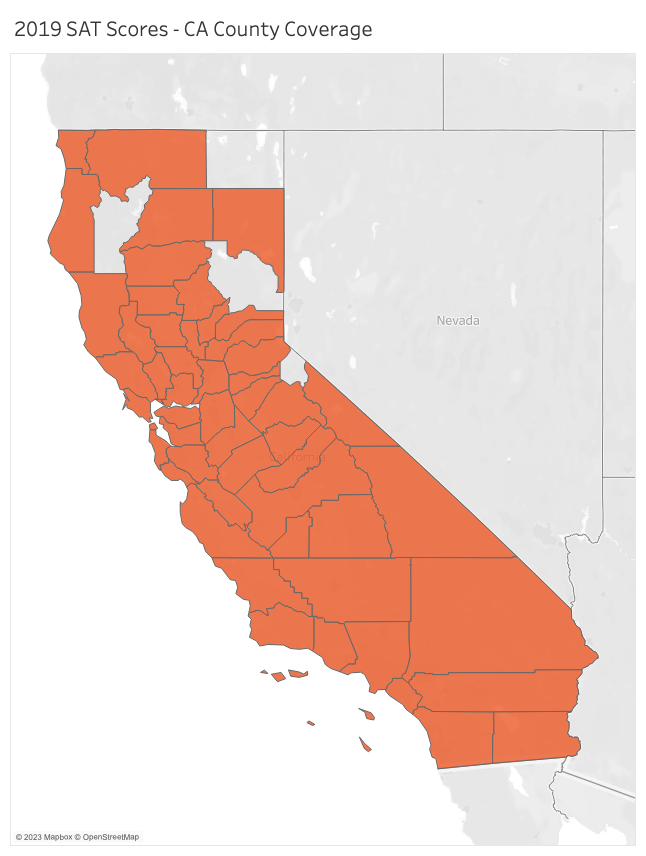

### Counties with the highest and lowest mean test scores

The objective of this project is to identify which California counties perform the lowest performance in SAT exam in 2019. The below bar chart illustrates the counties with the higest and lowest percentage of students who met or exceeded the benchmark for SAT test (both math and writing). 

In [33]:
sat.columns

Index(['school', 'district', 'county', 'num_of_testtakers',
       'num_benchmark_reading_writing', 'pct_benchmark_reading_writing',
       'num_benchmark_math', 'pct_benchmark_math', 'num_benchmark_both',
       'pct_benchmark_both'],
      dtype='object')

In [34]:
# Group by county and the mean test score (%)
sat_county = sat.groupby('county')['pct_benchmark_both'].mean().sort_values(ascending=True)

In [35]:
# Extract the lowest county
sat_bottom = sat_county[0:1]

# Extract the highest county
sat_top = sat_county[-1:]

# Combine top and bottom counties
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.combine_first.html
sat_top_bottom = sat_top.combine_first(sat_bottom).sort_values(ascending=True)
sat_top_bottom

county
Colusa     7.145
Nevada    78.220
Name: pct_benchmark_both, dtype: float64

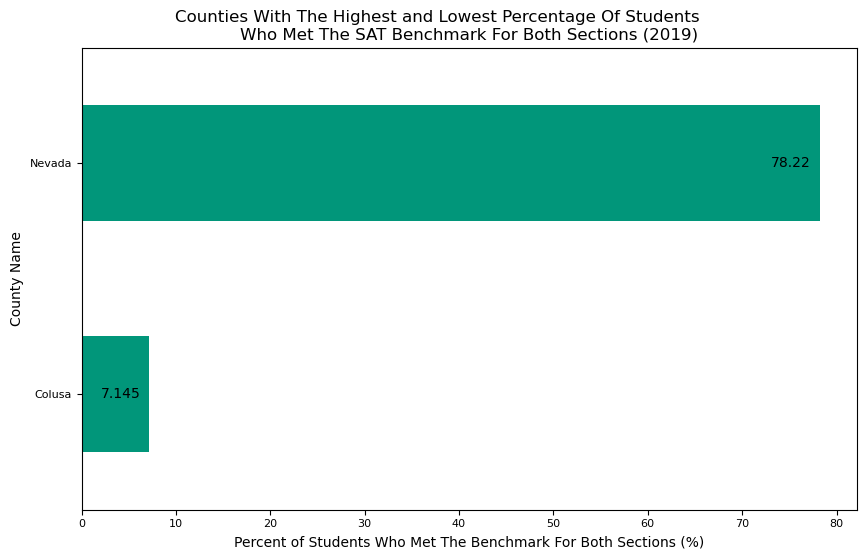

In [36]:
# Create a chart
# Reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html
# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html#matplotlib.axes.Axes.bar_label
sat_tb = sat_top_bottom.plot(kind='barh', 
                    fontsize = 8, 
                    figsize = (10, 6), 
                    color= '#01967a') 
plt.title('Counties With The Highest and Lowest Percentage Of Students\
            \nWho Met The SAT Benchmark For Both Sections (2019)')
plt.xlabel('Percent of Students Who Met The Benchmark For Both Sections (%)')
plt.ylabel('County Name')
sat_tb.bar_label(sat_tb.containers[0], label_type='edge', padding=-35);


### 10 Counties with the lowest percentage of students who met the benchmark for both sections 

The below bar chart exhibits the 10 California counties with the lowest percentages of students who met the benchmark for both SAT sections. Additionally, the second bar chart illustrates the number of schools in these ten counties.

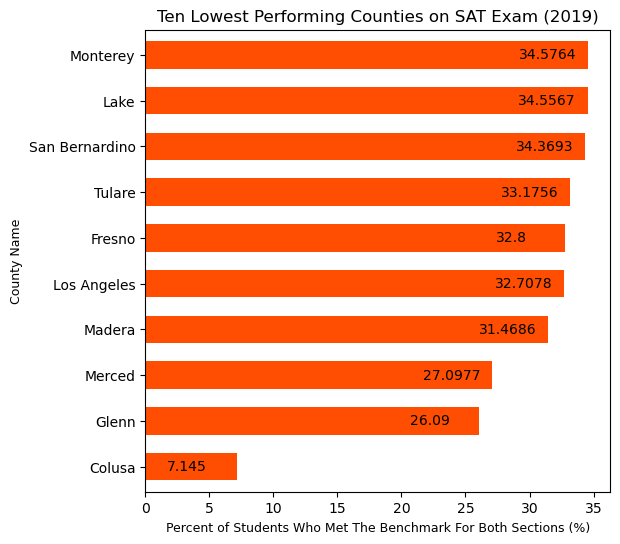

In [37]:
# Extract 10 counties with lowest % of test-takers who achieved ACT scores of 21 and above
sat_10 = sat_county[0:10]

# Size
plt.figure(figsize=(6, 6))

# Create a barchart
# Reference: https://stackoverflow.com/questions/8598163/split-title-of-a-figure-in-matplotlib-into-multiple-lines
sat_10_w = sat_10.plot(kind='barh', 
                       width=0.6,
                       color='#ff4d01')
plt.title('Ten Lowest Performing Counties on SAT Exam (2019)')  
plt.xlabel('Percent of Students Who Met The Benchmark For Both Sections (%)', fontsize=9)
plt.ylabel('County Name', fontsize=9)
sat_10_w.bar_label(sat_10_w.containers[0], label_type='edge', padding=-50);


In [38]:
# Check the index name
sat_10.index

Index(['Colusa', 'Glenn', 'Merced', 'Madera', 'Los Angeles', 'Fresno',
       'Tulare', 'San Bernardino', 'Lake', 'Monterey'],
      dtype='object', name='county')

In [39]:
# Pull the number of schools for the above 10 counties

# Create a dataframe, group by county and school
sat_schl = pd.DataFrame(sat.groupby('county')['school'].count()).reset_index()

# Take the top 10 counties
sat_10_sch = sat_schl.loc[(sat_schl['county']=='Colusa') | 
                          (sat_schl['county']=='Glenn') |
                          (sat_schl['county']=='Merced') |
                          (sat_schl['county']=='Madera') |
                          (sat_schl['county']=='Los Angeles') |
                          (sat_schl['county']=='Fresno') |
                          (sat_schl['county']=='Tulare') |
                          (sat_schl['county']=='San Bernardino') |
                          (sat_schl['county']=='Lake') |
                          (sat_schl['county']=='Monterey')]

In [40]:
sort_order = ['Colusa', 'Glenn', 'Merced', 'Madera', 
              'Los Angeles', 'Fresno','Tulare', 
              'San Bernardino', 'Lake', 'Monterey']

pd.options.mode.chained_assignment = None  # default='warn', delete warning 
sat_10_sch.loc[:, "county"] = pd.Categorical(sat_10_sch["county"], categories=sort_order)

sat_10_sch = sat_10_sch.sort_values(by="county")

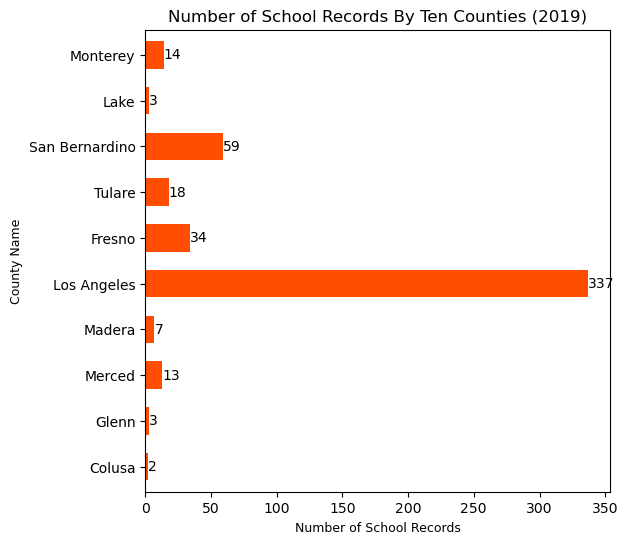

In [41]:
# Create a barchart
# Reference: https://stackoverflow.com/questions/8598163/split-title-of-a-figure-in-matplotlib-into-multiple-lines
sat_10_sch = sat_10_sch.plot(x='county', 
                 y='school', 
                 kind='barh', 
                 legend=False,
                 width=0.6,
                 figsize = (6, 6),
                 color='#ff4d01') 
plt.title('Number of School Records By Ten Counties (2019)')  
plt.xlabel('Number of School Records', fontsize=9)
plt.ylabel('County Name', fontsize=9)
sat_10_sch.bar_label(sat_10_sch.containers[0], label_type='edge', padding=0);


### Correlation across different datasets

The heatmap displays any correlations between different sections of the SAT exams. All the exam subjects have over 95% relationships with the `num_benchmark_both` and `num_benchmark_math` and `num_benchmark_reading_writing` columns

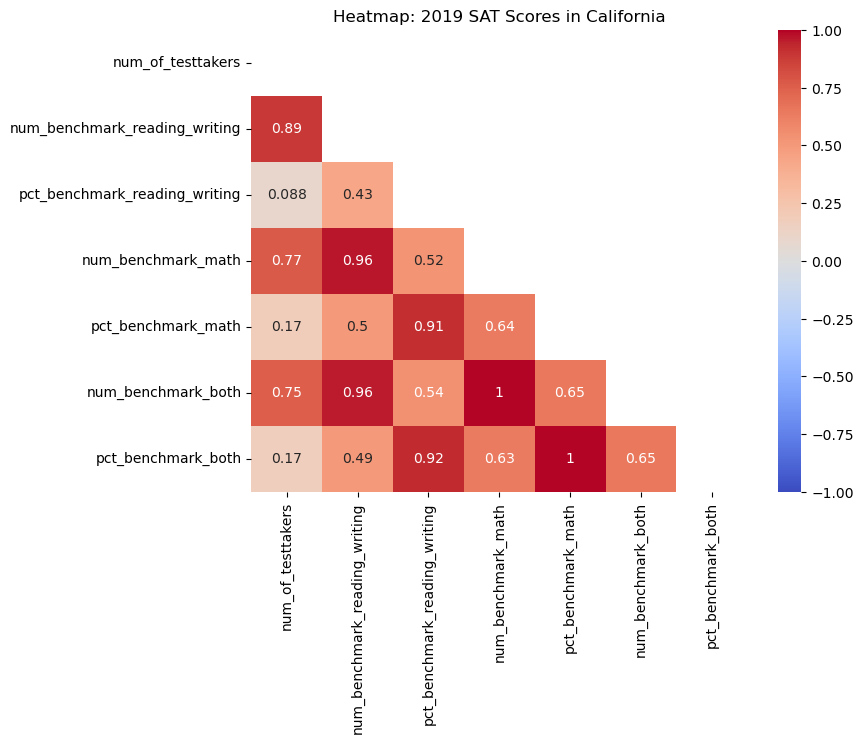

In [42]:
# Delete the upper triangle of a heatmap
# Reference: GA's Lesson - 107 Data Visualization
mask = np.zeros_like(sat.corr())   
mask[np.triu_indices_from(mask)] = True

# Create a heatmap
plt.figure(figsize = (8,6))
sns.heatmap(sat.corr(), mask = mask, annot = True, vmin = -1, vmax = 1, cmap="coolwarm");
plt.title('Heatmap: 2019 SAT Scores in California');

### Distribution of Average Test Scores by Subject

This boxplot represents the average test scores by subject. In California, reading had the highest average test score. The range of min and max % of students who met the benchmark are wide in both reading and math sections. 

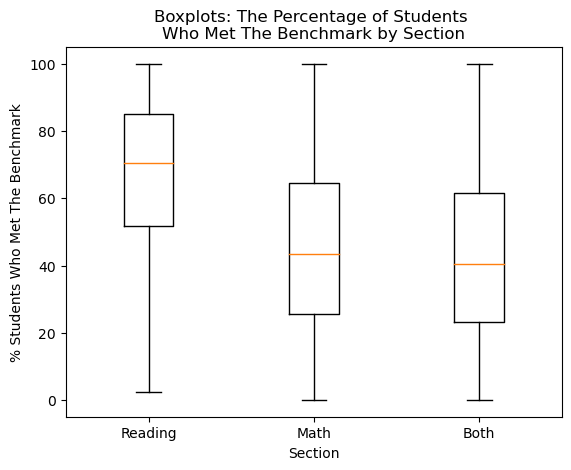

In [43]:
# Create a boxplot 
box_plot_data = [sat.pct_benchmark_reading_writing,
                 sat.pct_benchmark_math,
                 sat.pct_benchmark_both]

plt.boxplot(box_plot_data, labels=['Reading','Math', 'Both'])
plt.boxplot
plt.title('Boxplots: The Percentage of Students \nWho Met The Benchmark by Section')
plt.xlabel('Section')
plt.ylabel('% Students Who Met The Benchmark');

### Correlation between students the % of students who met the benchmark and 2 subjects

The scatter plot shows the correlation between the percentage of students who met or exceeded the benchmark for both sections and those for reading & writing or math. While reading has a correlation of r=0.92% to the percentage of students who met or exceeded the benchmark for both sections, math has a strongest correlation of r=1.0, indicating that improving math score is essential to increase the percentage of students exceeding the benchmark. 

In [44]:
sat.columns

Index(['school', 'district', 'county', 'num_of_testtakers',
       'num_benchmark_reading_writing', 'pct_benchmark_reading_writing',
       'num_benchmark_math', 'pct_benchmark_math', 'num_benchmark_both',
       'pct_benchmark_both'],
      dtype='object')

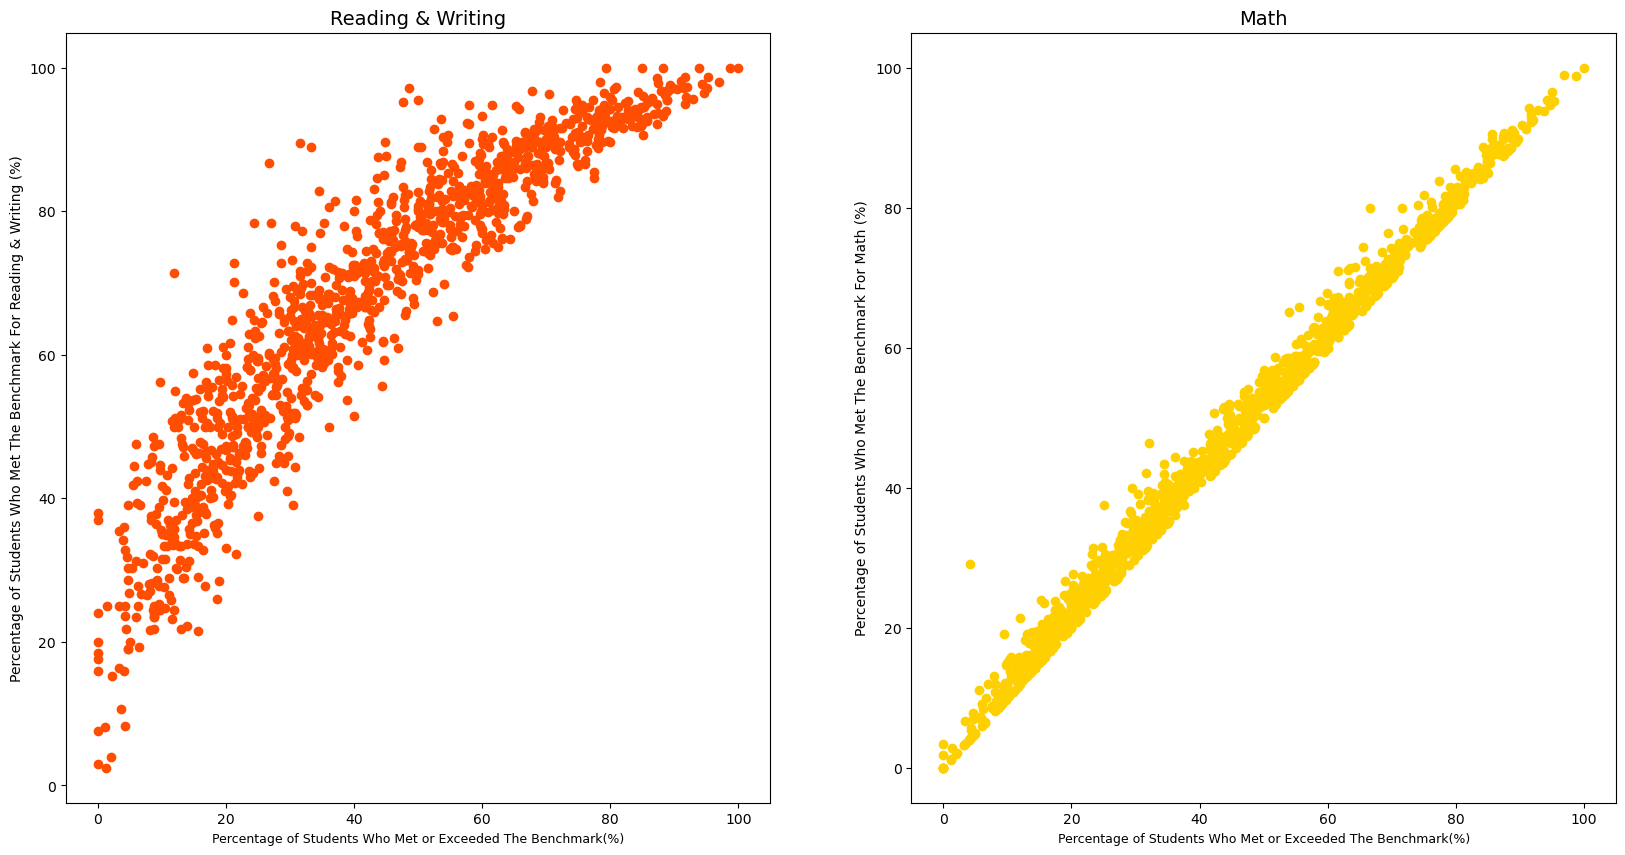

In [45]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 10))

# Correlation - English (r=0.92)
x_read= [sat.pct_benchmark_both]
y_read = [sat.pct_benchmark_reading_writing]
axes[0].scatter(x_read, y_read, color='#ff4d01')
axes[0].set_title('Reading & Writing', fontsize=14)
axes[0].set_xlabel('Percentage of Students Who Met or Exceeded The Benchmark(%)', fontsize=9)
axes[0].set_ylabel('Percentage of Students Who Met The Benchmark For Reading & Writing (%)')

# Correlation - math (r=1.0)
x_eng = [sat.pct_benchmark_both]
y_eng = [sat.pct_benchmark_math]
axes[1].scatter(x_eng, y_eng, color='#fed002')
axes[1].set_title('Math', fontsize=14)
axes[1].set_xlabel('Percentage of Students Who Met or Exceeded The Benchmark(%)', fontsize=9)
axes[1].set_ylabel('Percentage of Students Who Met The Benchmark For Math (%)')

plt.show();

In [46]:
# Average test score by sections in 10 Counties with worst test scores 
sat_10_score = sat.loc[(sat['county']=='Colusa') |
                               (sat['county']=='Glenn') |
                               (sat['county']=='Merced') |
                               (sat['county']=='Madera') |
                               (sat['county']=='Los Angeles') |
                               (sat['county']=='Fresno') |
                               (sat['county']=='Tulare') |
                               (sat['county']=='San Bernardino') |
                               (sat['county']=='Lake') |
                               (sat['county']=='Monterey')]

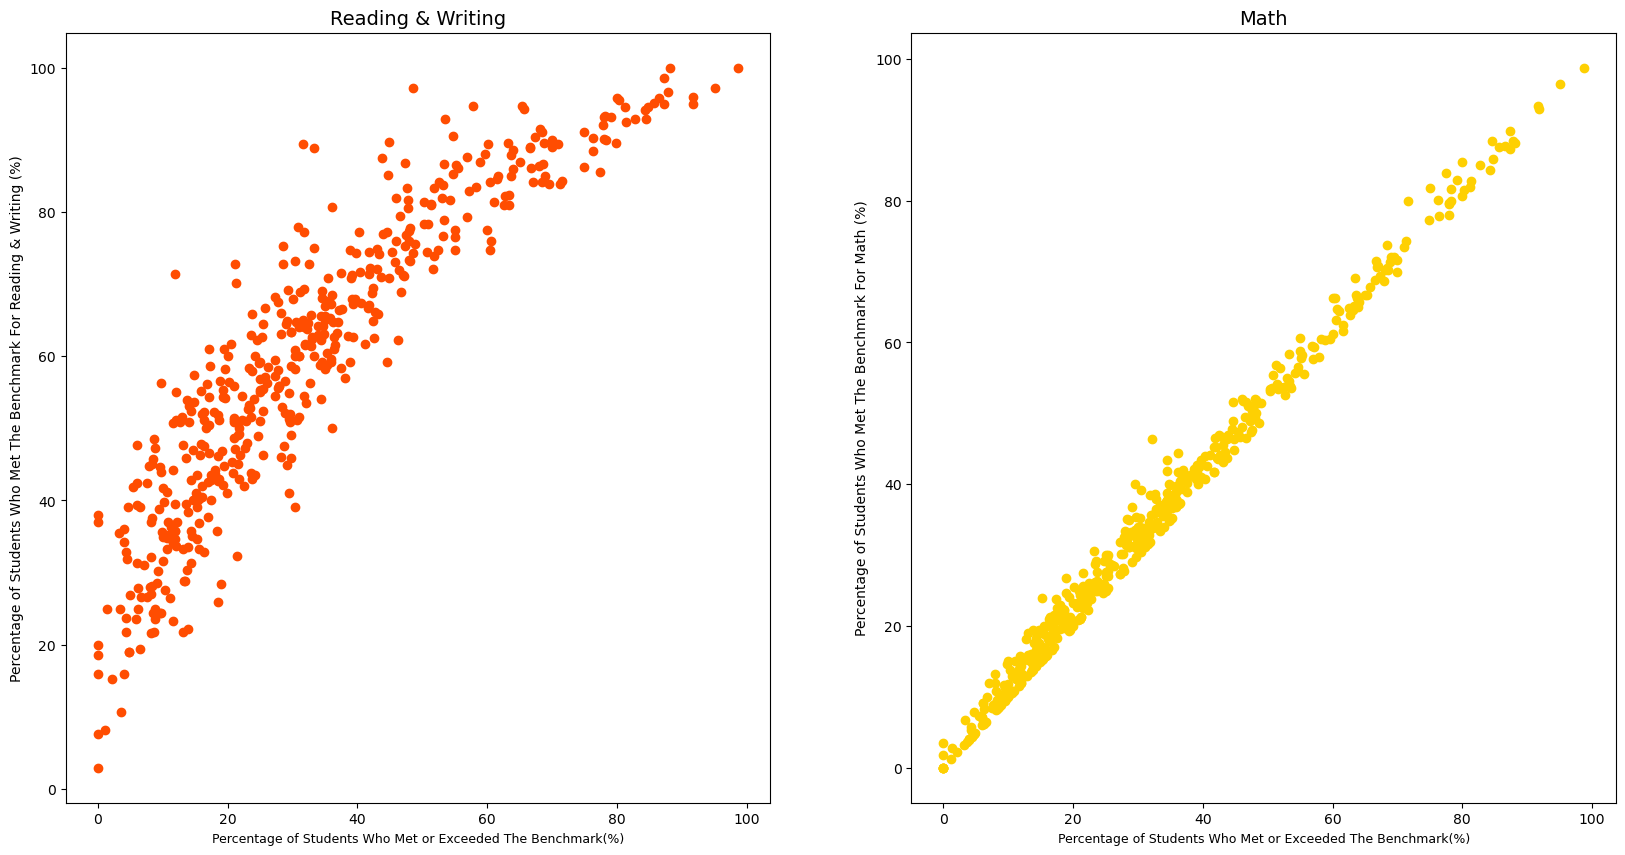

In [47]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 10))

# Correlation - English (r=0.92)
x_read= [sat_10_score.pct_benchmark_both]
y_read = [sat_10_score.pct_benchmark_reading_writing]
axes[0].scatter(x_read, y_read, color='#ff4d01')
axes[0].set_title('Reading & Writing', fontsize=14)
axes[0].set_xlabel('Percentage of Students Who Met or Exceeded The Benchmark(%)', fontsize=9)
axes[0].set_ylabel('Percentage of Students Who Met The Benchmark For Reading & Writing (%)')

# Correlation - math (r=1.0)
x_eng = [sat_10_score.pct_benchmark_both]
y_eng = [sat_10_score.pct_benchmark_math]
axes[1].scatter(x_eng, y_eng, color='#fed002')
axes[1].set_title('Math', fontsize=14)
axes[1].set_xlabel('Percentage of Students Who Met or Exceeded The Benchmark(%)', fontsize=9)
axes[1].set_ylabel('Percentage of Students Who Met The Benchmark For Math (%)')

plt.show();

### Average Test Score by Subject, California (Statewide) vs 10 Lowest Performing Counties on SAT

The grouped bar chart represents a comparison of the average test scores by subject, between the state of California and 10 lowest performing counties. 

Math has the strongest correlation, with a 100% correlation coefficient. The ten lowest-performing counties had only 35.04% of students who met the benchmark for both sections, which is lower than the state average of 45.25%. (Difference: 29.14%) For writing & reading, the difference is 13.70%

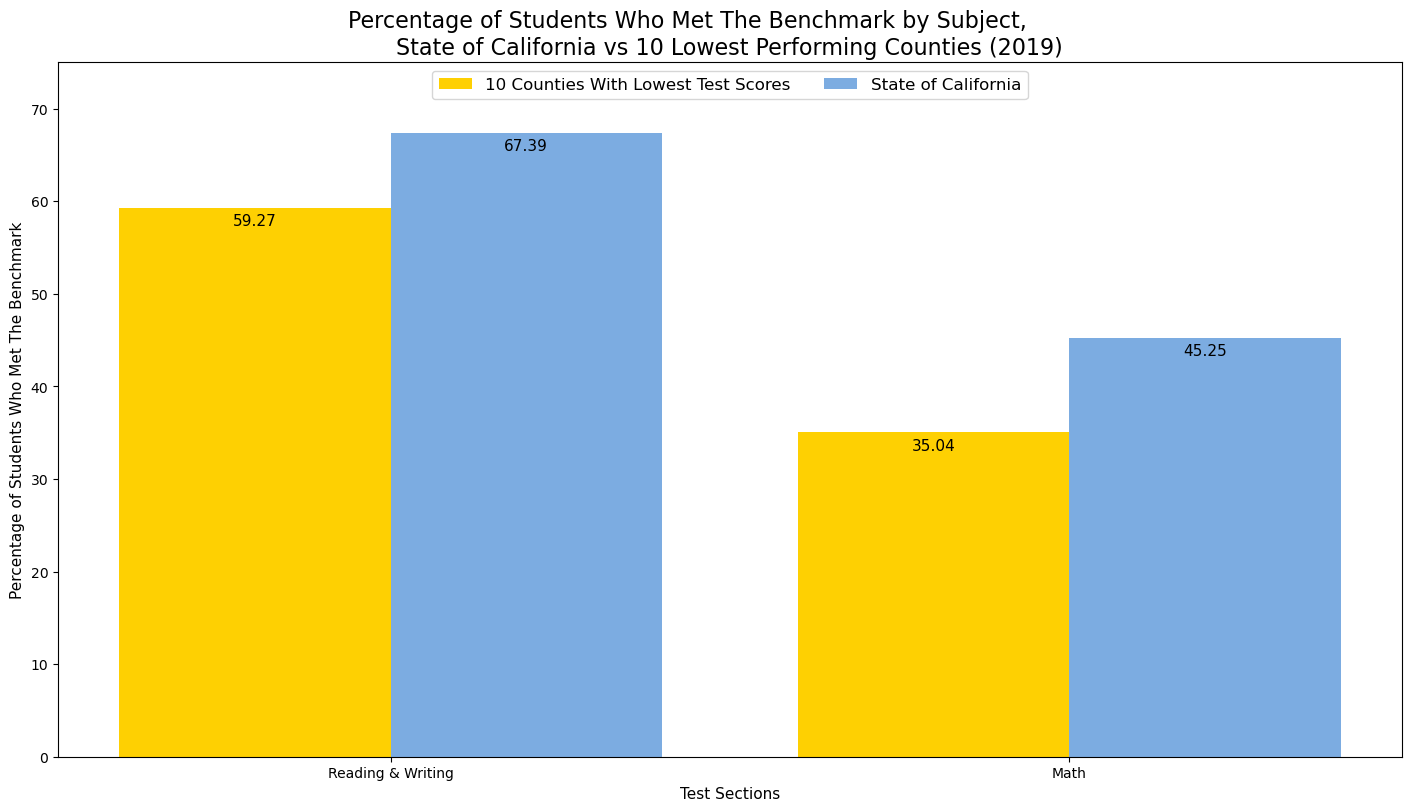

In [48]:
# Create a chart of average test score comparison by Statewide Levels and 10 Counties with Lowest Test Scores

# Reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

# Create dataset
section = ('Reading & Writing', 'Math')
sat_avg_score = {
    '10 Counties With Lowest Test Scores': (round(sat_10_score['pct_benchmark_reading_writing'].mean(), 2),
                                            round(sat_10_score['pct_benchmark_math'].mean(), 2),
                                           ),
    'State of California': (round(sat['pct_benchmark_reading_writing'].mean(), 2), 
                                     round(sat['pct_benchmark_math'].mean(), 2),
                                     )}

x = np.arange(len(section)) # the label locations
width = 0.4 # the width of the bars
multiplier=0
colors = {'10 Counties With Lowest Test Scores':'#fed002', 
          'State of California': '#7cace1'}

# Create a chart
fig, ax = plt.subplots(layout = 'constrained', figsize=(14, 8))

for attribute, measurement in sat_avg_score.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors[attribute])
    ax.bar_label(rects, padding=-15, fontsize=11)
    multiplier += 1


# Customize the chart
ax.set_ylabel('Percentage of Students Who Met The Benchmark', fontsize=11)
ax.set_xlabel('Test Sections', fontsize=11)
ax.set_title('Percentage of Students Who Met The Benchmark by Subject,\
            \nState of California vs 10 Lowest Performing Counties (2019)',fontsize=16)
ax.set_xticks(x+width/2, section)
ax.set_ylim(0, 75)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=5, fontsize=12)
plt.show();

## Conclusion and Recommendations

### Score Performance on SAT test in California (2019)
- In 2019, the ten lowest performing counties on SAT exam were Colusa, Glenn, Merced, Madera, Los Angeles, Fresno, Tulare, San Bernardino, Lake, and Monterey. 
- Due to the large number of schools located in Los Angeles county, allocating additional resources to the county could potentially improve overall SAT score performance at statewide levels.
- Among the ten counties, Colusa County had the lowest percentage of students who met the benchmark for both Evidence-Based Reading & Writing (ERW) and Math in the SAT exam, with only 7.15%. This is a significant difference compared to Nevada County, which had the highest percentage of students meeting the benchmark for both sections at 78.22%.
- While both the Writing & Reading and Math sections are essential in increasing the percentage of students meeting the benchmark for both SAT sections, Math has the strongest correlation, with a 100% correlation coefficient. The ten lowest-performing counties had only 35.04% of students who met the benchmark for both sections, which is lower than the state average of 45.25%. Given the importance of the Math section in increasing the percentage of students meeting the benchmark, these counties should focus on encouraging their students to improve their Math scores.

## Data Dictionary
What is data dictionary? Here are some references:
* [data dictionary](http://library.ucmerced.edu/node/10249)
* [Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

|Feature|Type|Dataset|Description|
|---|---|---|---|
|school|object|SAT|School Name|
|district|object|SAT|District/LEA Name|
|county|object|SAT|County Name|
|num_of_testtakers|float|SAT|Number of Test Takers Grade 12|
|num_benchmark_reading_writing|float|SAT|The number meeting the Evidence-Based Reading & Writing (ERW) benchmark established by the College Board based on the New 2016 SAT test format as of March 2016 for Grade 12|
|pct_benchmark_reading_writing|float|SAT|The percent of students who met or exceeded the benchmark for Evidence-Based Reading & Writing (ERW) test for Grade 12|
|num_benchmark_math|float|SAT|The number of students who met or exceeded the benchmark for the New SAT Math test format as of March 2016 for Grade 12|
|pct_benchmark_math|float|SAT|The percent of students who met or exceeded the benchmark for SAT Math test for Grade 12|
|num_benchmark_both|float|SAT|The total number of students who met the benchmark of both Evidence-Based Reading & Writing (ERW) and Math Grade 12|
|pct_benchmark_both|float|SAT|The percent of students who met the benchmark of both Evidence-Based Reading & Writing (ERW) and Math Grade 12|